In [10]:
import pandas as pd
import geopandas as gpd

import folium
import branca

In [12]:
krs_path = "VG250_KRS.shp"

krs= gpd.read_file(krs_path)

krs = krs.to_crs({'init': 'epsg:4326'})
krs = krs[krs.GF==4].copy()

In [13]:
krs.head()

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,EWZ,KFL,DEBKG_ID,geometry
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,000,R,DEF01,010010000000,01001000,2008-01-01,88519,56.73,DEBKGDL20000002R,"POLYGON ((9.412664108896106 54.82264090832692,..."
1,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,...,000,R,DEF02,010020000000,01002000,2006-01-01,247943,118.65,DEBKGDL20000E43X,"POLYGON ((10.16915818579685 54.43137670797368,..."
2,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,...,000,R,DEF03,010030000000,01003000,2006-02-01,216318,214.19,DEBKGDL20000DYM9,"POLYGON ((10.87683500018058 53.98736518615582,..."
3,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,40,--,...,000,R,DEF04,010040000000,01004000,1970-04-26,79335,71.66,DEBKGDL20000E4KX,"POLYGON ((9.995446122384308 54.14971926107452,..."
4,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,42,--,...,000,R,DEF05,010510000000,01051000,2011-08-01,133447,1428.18,DEBKGDL20000E14G,"(POLYGON ((8.692576916706928 54.0604453951815,..."


In [14]:
len(krs)

401

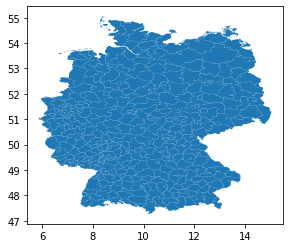

In [15]:
krs.plot()

In [16]:
krs_simp= krs.simplify(0.02)
krs['geometry']=krs_simp

In [32]:
##### DATA #####

In [7]:
path_data = "BKA-LKS-F-03-T01-Kreise_csv.csv"
data= pd.read_csv(path_data, skiprows=1,sep=";", encoding='latin-1')
data.head()

,Schluessel,Straftat,Gemeindeschluessel,Stadt-/Landkreis,Kreisart,erfasste Faelle,HZ nach Zensus,Versuche - Anzahl,Versuche - Anteil in %,mit Schusswaffe gedroht,mit Schusswaffe geschossen,aufgeklaerte Faelle,Aufklaerungsquote,Tatverdaechtige insgesamt,Tatverdaechtige - maennlich,Tatverdaechtige - weiblich,Nichtdeutsche Tatverdaechtige - Anzahl,Nichtdeutsche Tatverdaechtige - Anteil in %
0,------,Straftaten insgesamt,1001,Flensburg,KfS,"8,156","9,214",633,7.8,11,5,"4,878",59.8,"3,474","2,635",839,"1,178",33.9
1,------,Straftaten insgesamt,1002,Kiel,KfS,"24,621","9,930","1,787",7.3,13,8,"11,941",48.5,"7,877","6,065","1,812","2,251",28.6
2,------,Straftaten insgesamt,1003,Lübeck,KfS,"22,685","10,487","1,682",7.4,21,21,"12,727",56.1,"7,858","5,940","1,918","2,068",26.3
3,------,Straftaten insgesamt,1004,Neumünster,KfS,"10,688","13,472",897,8.4,12,4,"6,660",62.3,"5,061","3,738","1,323","2,465",48.7
4,------,Straftaten insgesamt,1051,Dithmarschen,K,"7,224","5,413",440,6.1,4,13,"4,163",57.6,"3,169","2,392",777,577,18.2


In [22]:
allStraf= list(data.Straftat.unique())
allStraf

['Straftaten insgesamt',
 'Vergewaltigung, sexuelle Nötigung und sexueller Übergriff im besonders schweren Fall einschl. mit Todesfolge §§ 177, 178 StGB',
 'Raub, räuberische Erpressung und räuberischer Angriff auf Kraftfahrer §§ 249-252, 255, 316a StGB',
 'Raub, räuberische Erpressung auf/gegen Geldinstitute, Postfilialen und -agenturen',
 'Raub, räuberische Erpressung auf/gegen sonstige Zahlstellen und Geschäfte',
 'Handtaschenraub',
 'Sonstige Raubüberfälle auf Straßen, Wegen oder Plätzen',
 'Raubüberfälle in Wohnungen',
 'Gefährliche und schwere Körperverletzung, Verstümmelung weiblicher Genitalien §§ 224, 226, 226a, 231 StGB',
 'Vorsätzliche einfache Körperverletzung § 223 StGB',
 'Diebstahl ohne erschwerende Umstände §§ 242, 247, 248a-c StGB und zwar:',
 'Einfacher Ladendiebstahl',
 'Diebstahl unter erschwerenden Umständen §§ 243-244a StGB und zwar:',
 'Wohnungseinbruchdiebstahl §§ 244 Abs. 1 Nr. 3 und Abs. 4, 244a StGB',
 'Tageswohnungseinbruchdiebstahl §§ 244 Abs. 1 Nr. 3 und A

In [ ]:
#Beobachtungen:
# Gewaltkriminalität: gute Aufklärungsquote in Bayern -> wenige Fälle
# Computerkriminalität: Wilhelmshaven und Spree

# Betrug: Schwerin und Erfurt
# Betrug: Schwerin und Erfurt

# Unterschlagung: Brandenburg

# Rauschgiftdelikte: Jena, Mannheim, Würzburg


In [28]:

#field_att='Rauschgiftdelikte (soweit nicht bereits mit anderer Schlüsselzahl erfasst)'


for field_att in allStraf:
    data_fil = data[data.Straftat==field_att].copy()
    krs["RS_int"]=krs["RS"].astype(int)
    join_df= krs.merge(data_fil, left_on='RS_int',right_on='Gemeindeschluessel', how='left')



    #relativ
    field_rel='erfasste Faelle'


    #join_df['field_EWZ']=join_df['Tatverdaechtige insgesamt'].astype(int)/join_df['EWZ']
    join_df['field_EWZ']=join_df[field_rel].str.replace(',','').astype(int)/join_df['EWZ']
    join_df['field_EWZ_rel']=join_df['field_EWZ'].apply(lambda n: '{:,.3%}'.format(n))

    df=join_df

    field="field_EWZ"

    colorscale = branca.colormap.LinearColormap(['green','yellow','red'], index=None, vmin=(df[field]).min(), vmax=(df[field]).max(), caption='')


    def style_function(feature):
        col=feature['properties'][field]
        return {
            'fillOpacity': 0.5,
            'weight': 0,
            'fillColor': 'grey' if col is None else colorscale(col)
        }

    m = folium.Map(location=[51, 12], tiles="Stamen Toner", zoom_start=6)

    folium.GeoJson(
        df,
        name='elternzeit',
        tooltip=folium.GeoJsonTooltip(fields=['GEN','EWZ',field_rel,'field_EWZ_rel','Aufklaerungsquote'],
                                      aliases=['Kreis','Einwohner',field_rel,'Anteil','Aufklaerungsquote']),
        style_function=style_function
    ).add_to(m)

    colorscale.caption = field_att
    m.add_child(colorscale)

    m.save('html/pks2018krs_{}.html'.format(field_att.replace(',','').replace('/','').replace('-','')))


In [25]:
join_df.columns

Index(['ADE', 'GF', 'BSG', 'RS', 'AGS', 'SDV_RS', 'GEN', 'BEZ', 'IBZ', 'BEM',
       'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1', 'SN_V2', 'SN_G', 'FK_S3',
       'NUTS', 'RS_0', 'AGS_0', 'WSK', 'EWZ', 'KFL', 'DEBKG_ID', 'geometry',
       'RS_int', 'Schluessel', 'Straftat', 'Gemeindeschluessel',
       'Stadt-/Landkreis', 'Kreisart', 'erfasste Faelle', 'HZ nach Zensus',
       'Versuche - Anzahl', 'Versuche - Anteil in %',
       'mit Schusswaffe gedroht', 'mit Schusswaffe geschossen',
       'aufgeklaerte Faelle', 'Aufklaerungsquote', 'Tatverdaechtige insgesamt',
       'Tatverdaechtige - maennlich', 'Tatverdaechtige - weiblich',
       'Nichtdeutsche Tatverdaechtige - Anzahl',
       'Nichtdeutsche Tatverdaechtige - Anteil in %', 'field_EWZ',
       'field_EWZ_rel'],
      dtype='object')

In [89]:
join_df.sort_values('field_EWZ')

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,mit Schusswaffe gedroht,mit Schusswaffe geschossen,aufgeklaerte Faelle,Aufklaerungsquote,Tatverdaechtige insgesamt,Tatverdaechtige - maennlich,Tatverdaechtige - weiblich,Nichtdeutsche Tatverdaechtige - Anzahl,Nichtdeutsche Tatverdaechtige - Anteil in %,field_EWZ
303,4,4,1,09679,09679,096630000000,Würzburg,Landkreis,43,--,...,0,1,164,98.8,65,51,14,16,24.6,0.000403
255,4,4,1,09278,09278,092630000000,Straubing-Bogen,Landkreis,43,--,...,1,0,57,93.4,65,52,13,33,50.8,0.000651
287,4,4,1,09573,09573,095730134134,Fürth,Landkreis,43,--,...,1,0,73,90.1,79,62,17,17,21.5,0.000680
249,4,4,1,09272,09272,092720118118,Freyung-Grafenau,Landkreis,43,--,...,0,0,41,100.0,54,42,12,14,25.9,0.000689
272,4,4,1,09472,09472,094620000000,Bayreuth,Landkreis,43,--,...,1,0,70,87.5,72,59,13,14,19.4,0.000694
201,4,4,1,08236,08236,082310000000,Enzkreis,Landkreis,43,--,...,0,0,116,88.5,141,120,21,57,40.4,0.000711
286,4,4,1,09572,09572,095620000000,Erlangen-Höchstadt,Landkreis,43,--,...,0,1,98,93.3,106,89,17,34,32.1,0.000783
302,4,4,1,09678,09678,096620000000,Schweinfurt,Landkreis,43,--,...,0,0,79,95.2,91,77,14,28,30.8,0.000791
295,4,4,1,09671,09671,096610000000,Aschaffenburg,Landkreis,43,--,...,1,2,122,91.7,139,98,41,35,25.2,0.000799
264,4,4,1,09375,09375,093620000000,Regensburg,Landkreis,43,--,...,3,1,123,94.6,158,133,25,62,39.2,0.000822


In [90]:
join_df.sort_values('Aufklaerungsquote')

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,mit Schusswaffe gedroht,mit Schusswaffe geschossen,aufgeklaerte Faelle,Aufklaerungsquote,Tatverdaechtige insgesamt,Tatverdaechtige - maennlich,Tatverdaechtige - weiblich,Nichtdeutsche Tatverdaechtige - Anzahl,Nichtdeutsche Tatverdaechtige - Anteil in %,field_EWZ
324,4,4,1,11000,11000,110000000000,Berlin,Kreisfreie Stadt,40,--,...,177,65,"10,084",63.2,"11,563","9,690","1,873","5,254",45.4,0.003200
61,4,4,1,04011,04011,040110000000,Bremen,Kreisfreie Stadt,40,--,...,53,5,"1,571",64.1,"1,909","1,693",216,896,46.9,0.003361
63,4,4,1,05111,05111,051110000000,Düsseldorf,Kreisfreie Stadt,40,--,...,10,6,"1,458",65.2,"2,032","1,797",235,889,43.8,0.003292
79,4,4,1,05315,05315,053150000000,Köln,Kreisfreie Stadt,40,--,...,35,14,"3,375",66.9,"4,813","4,044",769,"1,949",40.5,0.004455
62,4,4,1,04012,04012,040120000000,Bremerhaven,Kreisfreie Stadt,40,--,...,15,3,389,67.0,509,433,76,179,35.2,0.004503
365,4,4,1,15002,15002,150020000000,Halle (Saale),Kreisfreie Stadt,40,--,...,11,5,799,67.4,877,750,127,325,37.1,0.003667
361,4,4,1,14713,14713,147130000000,Leipzig,Kreisfreie Stadt,40,--,...,13,8,"1,287",67.9,"1,477","1,281",196,598,40.5,0.002538
366,4,4,1,15003,15003,150030000000,Magdeburg,Kreisfreie Stadt,40,--,...,3,5,630,67.9,732,634,98,193,26.4,0.003069
15,4,4,1,02000,02000,020000000000,Hamburg,Kreisfreie Stadt,40,--,...,85,19,"5,214",68.0,"6,355","5,302","1,053","3,059",48.1,0.003472
90,4,4,1,05513,05513,055130000000,Gelsenkirchen,Kreisfreie Stadt,40,--,...,5,4,614,68.2,878,741,137,315,35.9,0.003373
